In [118]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme(style="whitegrid", color_codes=True)

In [119]:
# data_paths
train_ds_path = pathlib.Path('../data/train.csv')
test_ds_path = pathlib.Path('../data/test.csv')

In [120]:
# read train dataset
train_df = pd.read_csv(train_ds_path)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
# Inspect the amount of NaN values for each column
print('Overall Dataframe info:\n')
print(train_df.info(verbose=True))
print('\n', '=' * 40, '\n')
print('NaN count by columns:\n\n', train_df.isna().sum())
print('\n', '=' * 40, '\n')
age_nan_perc = train_df['Age'].isnull().sum() / train_df.shape[0] * 100
print('Percent of ["Age"] NaN values is %.2f%%' % age_nan_perc)
cabin_nan_perc = train_df['Cabin'].isnull().sum() / train_df.shape[0] * 100
print('Percent of ["Cabin"] NaN values is %.2f%%' % cabin_nan_perc)
embarked_nan_perc = train_df['Embarked'].isnull().sum() / train_df.shape[0] * 100
print('Percent of ["Embarked"] NaN values is %.2f%%' % embarked_nan_perc)

Overall Dataframe info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


NaN count by columns:

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             

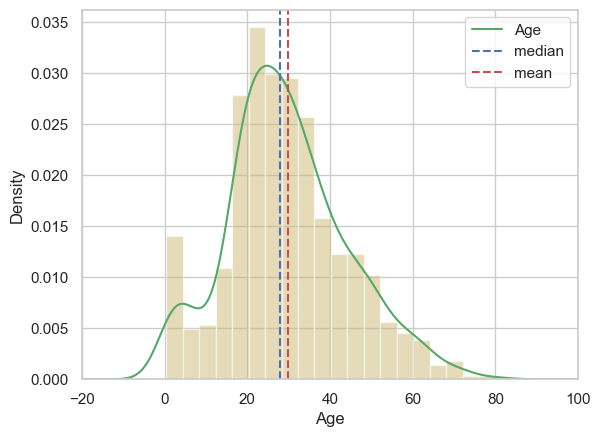

Age median is 28.0.
Age mean is 29.69911764705882.


In [122]:
# Inspect Age column
# Plot histogram and density

age_median = train_df['Age'].median()
age_mean = train_df['Age'].mean()

train_df['Age'].hist(bins=20, density=True, color='y', alpha=0.5)
train_df['Age'].plot(kind='density', color='g')
plt.axvline(age_median, color='b', linestyle='--', label='median')
plt.axvline(age_mean, color='r', linestyle='--', label='mean')
plt.xlabel('Age')
plt.xlim(-20, 100)
plt.legend()
plt.show()

print('Age median is %s.' % age_median)
print('Age mean is %s.' % age_mean)

It appearse the age distribution to be right-skewed so i will use median to fill in the NaN values.

In case of right- or left-skewed distribution median considered more robust statistic than mean, because mean is overestimating (right-skewed) or underestimating (left-skewed) the most common values.